Q1
A Classificaiton decision tree adresses problems using an algorithm to categorize data into smaller and smaller subsets based on specific attributes. Some applications where this would be useful are using medical data of a patient to make a medical diagnosis and email organization to seperate spam from important mail based on key words, sender, etc.
These classification predictions are different than the regression predictions of a Multiple Linear Regression as a linear regression uses a fitted linear relationship of the data to provide continuous numerical predictions.  

Q2
1 The accuracy metric is best used when a dataset has roughly the same amount of posiitve and negative cases, for example results of a survey with only two options of satisfied or unsatisfied. This metric would be useful in this case to ensure that the output of overal satisfacton vs unsatisfaction is accurate so the survey conducter can alter their service accordingly. 

2 The sensitivity metric is best used when false negatives are problematic, such as medical diagnoses. This is especially applicable for high risk illnesses where a false negative could lead to a late diagnosis which would be critical for the patient.

3 The specificity metric is used when false positives are problematic. An example of such case would be security screening, where specificity would decrease the amount of falsely identified safety threats, saving time and rescources. 

4 The precision metric is also used when false positives cause issues, such as in email sorting. Precision could help avoid wrongly identifying mail as spam when it is actually important for the recipient to see.  

Q3


In [6]:
import pandas as pd
import numpy as np

# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
df = pd.read_csv(url, encoding='ISO-8859-1')

# Display the first few rows of the dataset
print("Initial data preview:")
print(df.head())

# Check column names to ensure the ones we want to drop exist
print("\nColumns in the dataset:")
print(df.columns)

# Drop the specified columns ("Weight_oz", "Width", "Height") if they exist
columns_to_drop = ["Weight_oz", "Width", "Height"]
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# Display the updated dataframe to confirm the columns have been removed
print("\nData after dropping columns:")
print(df.head())

# Drop rows with any NaN values
df.dropna(inplace=True)

# Check the shape of the dataframe after dropping rows
print(f"\nData shape after dropping NaN values: {df.shape}")

# Convert "Pub year" and "NumPages" to integer type, handle any errors
df["Pub year"] = pd.to_numeric(df["Pub year"], errors='coerce').astype('Int64', errors='ignore')  # 'Int64' is for nullable integers
df["NumPages"] = pd.to_numeric(df["NumPages"], errors='coerce').astype('Int64', errors='ignore')

# Convert "Hard_or_Paper" to categorical type
df["Hard_or_Paper"] = df["Hard_or_Paper"].astype("category")

# Check the data types after conversion
print("\nData types after conversion:")
print(df.dtypes)

# Optionally, check the first few rows again after processing
print("\nFinal data preview:")
print(df.head())

Initial data preview:
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P     304.0         Adams Media   
1       15.00         10.20             P     273.0          Free Press   
2        1.50          1.50             P      96.0  Dover Publications   
3       15.99         10.87             P     672.0    Harper Perennial   
4       30.50         16.77             P     720.0               Knopf   

   Pub year     ISBN-10  Height  Width  Thick  Weight_oz  
0    2010.0  1605506249     7

In [7]:
df["Hard_or_Paper"].value_counts()

Hard_or_Paper
P    233
H     86
Name: count, dtype: int64

In [8]:
df.duplicated().sum()

0

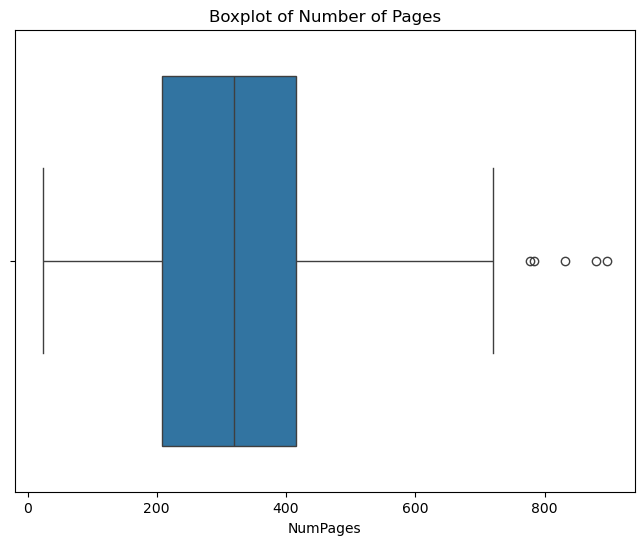

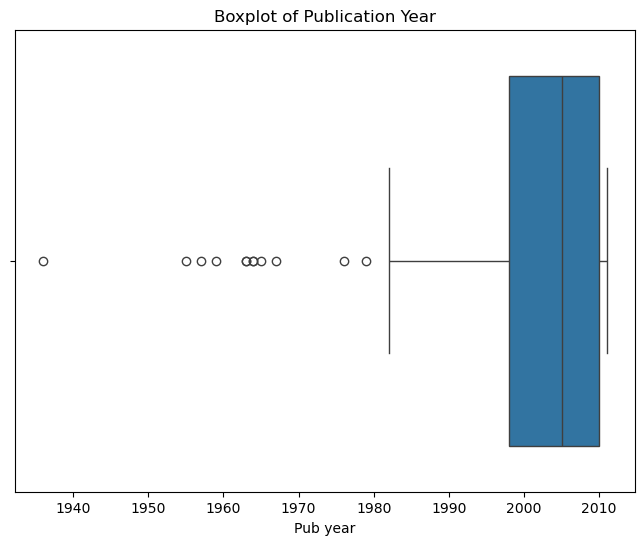

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for "NumPages"
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["NumPages"])
plt.title("Boxplot of Number of Pages")

# Show the plot as PNG
plt.show()  # Display the plot

plt.close()

# Boxplot for "Pub year"
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Pub year"])
plt.title("Boxplot of Publication Year")

# Show the plot as PNG
plt.show()  # Display the plot

plt.close()

In [10]:
df.describe()

,List Price,Amazon Price,NumPages,Pub year,Thick
count,319.000000,319.000000,319.0,319.0,319.000000
mean,18.362978,12.941034,334.272727,2002.175549,0.903448
std,13.976755,12.436673,161.60151,10.646133,0.365261
min,1.500000,0.770000,24.0,1936.0,0.100000
25%,13.890000,8.600000,208.0,1998.0,0.600000
50%,15.000000,10.200000,320.0,2005.0,0.900000
75%,19.360000,12.560000,416.0,2010.0,1.100000
max,139.950000,139.950000,896.0,2011.0,2.100000


Q4 

Number of observations in training set: 260
Number of observations in testing set: 65
Training set accuracy: 0.8346
Testing set accuracy: 0.8462


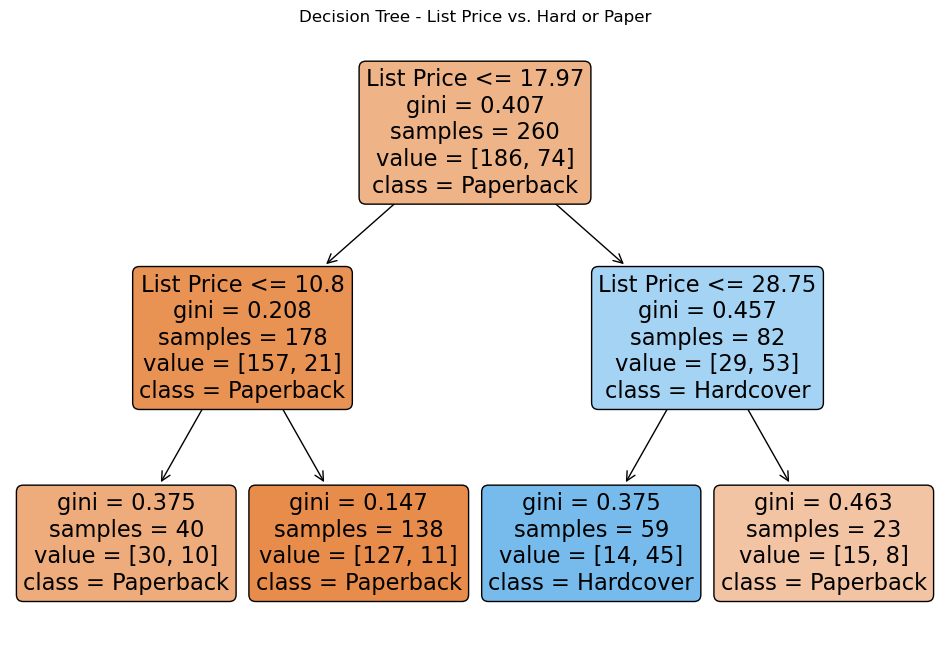

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming `ab_reduced_noNaN` is already defined and pre-processed (columns dropped, NaNs removed, and types adjusted)

# Step 1: Split the data into 80% training and 20% testing
X = ab_reduced_noNaN[['List Price']]  # Feature: List Price
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target: 1 for hardcover, 0 for paperback

# Using train_test_split to create an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Report the number of observations in the training and testing sets
print(f"Number of observations in training set: {X_train.shape[0]}")
print(f"Number of observations in testing set: {X_test.shape[0]}")

# Step 2: Create and train the DecisionTreeClassifier model
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Report the accuracy of the model on the training and testing sets
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print(f"Training set accuracy: {train_accuracy:.4f}")
print(f"Testing set accuracy: {test_accuracy:.4f}")

# Step 3: Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], rounded=True)
plt.title("Decision Tree - List Price vs. Hard or Paper")
plt.show()

In the resulting training data set there are 260 observations and 65 in the testing data set. 
The two given steps are preparing the data for the classification model.
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H'] converts the target variable Hard_or_Paper into binary data where 1 is hardcover and 0 is paperback.
X = ab_reduced_noNaN[['List Price']] selects List Price to be the independent variable used for prediction. 

Q5

Number of observations in training set: 260
Number of observations in testing set: 65
Training set accuracy: 0.9115
Testing set accuracy: 0.8308


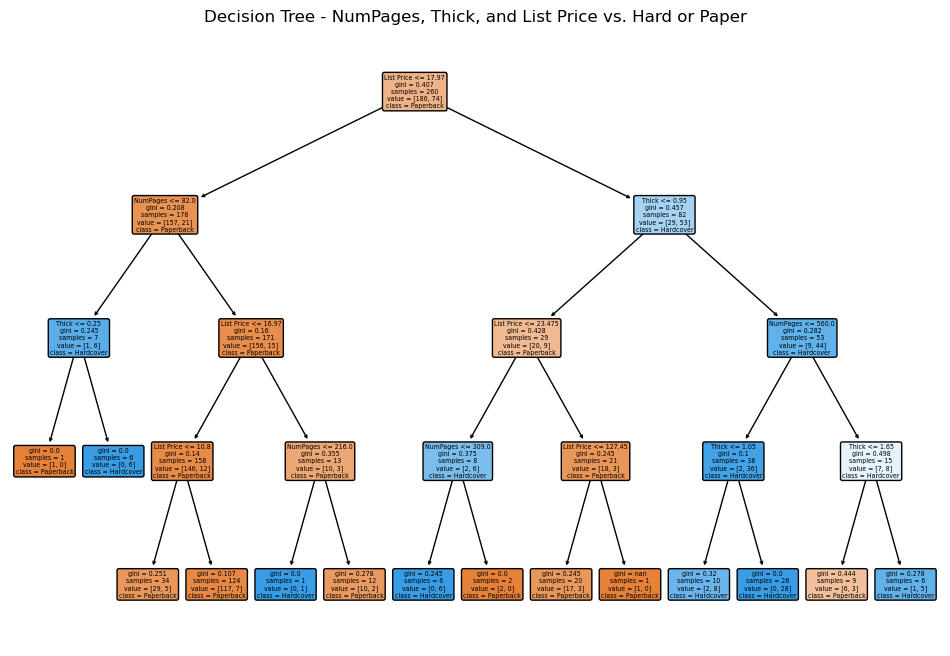

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming `ab_reduced_noNaN` is already loaded and preprocessed (NaNs dropped, types adjusted, etc.)

# Step 1: Prepare the features and target
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]  # Features
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target: 1 for hardcover, 0 for paperback

# Step 2: Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Report the number of observations in the training and testing sets
print(f"Number of observations in training set: {X_train.shape[0]}")
print(f"Number of observations in testing set: {X_test.shape[0]}")

# Step 3: Create and train the DecisionTreeClassifier model
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Report the accuracy of the model on the training and testing sets
train_accuracy = clf2.score(X_train, y_train)
test_accuracy = clf2.score(X_test, y_test)

print(f"Training set accuracy: {train_accuracy:.4f}")
print(f"Testing set accuracy: {test_accuracy:.4f}")

# Step 4: Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf2, filled=True, feature_names=['NumPages', 'Thick', 'List Price'], class_names=['Paperback', 'Hardcover'], rounded=True)
plt.title("Decision Tree - NumPages, Thick, and List Price vs. Hard or Paper")
plt.show()

clf2 makes predictions by repeatedly splitting the data at each node based on feature values (such as NumPages, Thick, and List Price) until it reaches a leaf node that assigns the predicted class based on the majority class of the samples in that leaf.

Q6

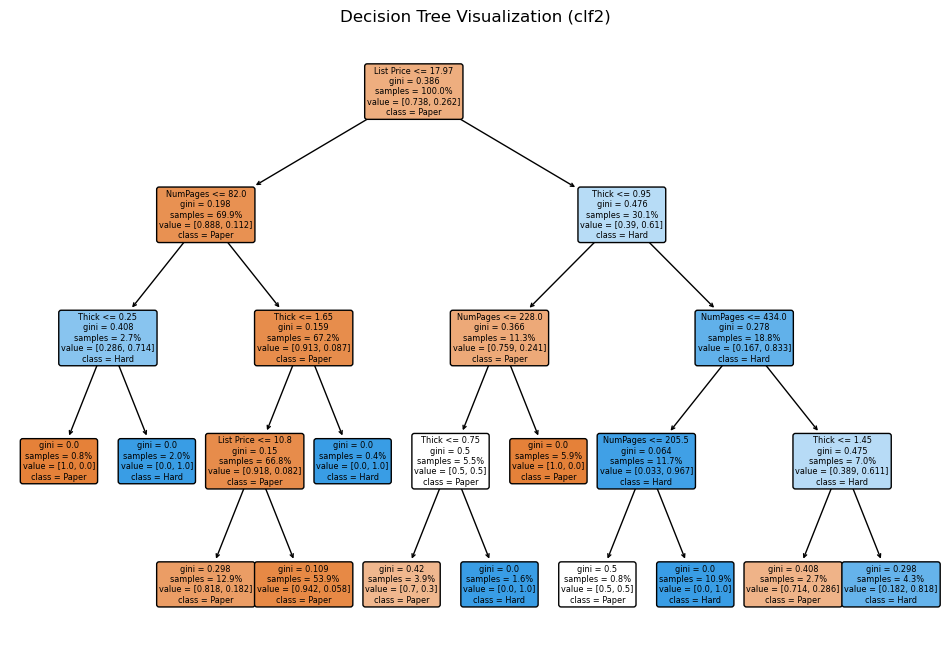

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming X_train and y_train are already defined from your 80/20 split

# Initialize the DecisionTreeClassifier (clf2 model) with max_depth of 4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the classifier using 'NumPages', 'Thick', and 'List Price' as features
clf2.fit(X_train[['NumPages', 'Thick', 'List Price']], y_train)

# Visualize the trained decision tree
plt.figure(figsize=(12, 8))  # Set the figure size
plot_tree(clf2, 
          filled=True,  # Fill the nodes with color
          feature_names=['NumPages', 'Thick', 'List Price'],  # Feature names for the tree
          class_names=["Paper", "Hard"],  # Class names corresponding to the target variable
          rounded=True,  # Rounded corners for the nodes
          proportion=True)  # Proportions of samples in each node
plt.title("Decision Tree Visualization (clf2)")
plt.show()


In [31]:
from sklearn.model_selection import train_test_split

# Assuming `df` is your dataset after preprocessing
# Split the data into features (X) and target (y)
X = df[['NumPages', 'Thick', 'List Price']]  # Features
y = pd.get_dummies(df['Hard_or_Paper'])['H']  # Target variable (1 = Hardcover, 0 = Paperback)

# Split the data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now X_train, X_test, y_train, and y_test are ready for model training and evaluation
print(f"Number of observations in the training set: {X_train.shape[0]}")
print(f"Number of observations in the test set: {X_test.shape[0]}")
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier

# Fit the DecisionTreeClassifier on training data
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)  # Fit the model

# Make predictions on the test set
y_pred_clf2 = clf2.predict(X_test)

# Compute confusion matrix
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Compute metrics
TP_clf2 = cm_clf2[1, 1]
TN_clf2 = cm_clf2[0, 0]
FP_clf2 = cm_clf2[0, 1]
FN_clf2 = cm_clf2[1, 0]

# Sensitivity, Specificity, and Accuracy
sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2)  # Sensitivity (True Positive Rate)
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)  # Specificity (True Negative Rate)
accuracy_clf2 = (TP_clf2 + TN_clf2) / (TP_clf2 + TN_clf2 + FP_clf2 + FN_clf2)  # Accuracy

# Print confusion matrix and metrics
print("Confusion Matrix for clf2 (using 'NumPages', 'Thick', 'List Price'):")
print(cm_clf2)
print(f"Sensitivity: {sensitivity_clf2:.4f}")
print(f"Specificity: {specificity_clf2:.4f}")
print(f"Accuracy: {accuracy_clf2:.4f}")


Number of observations in the training set: 255
Number of observations in the test set: 64
Confusion Matrix for clf2 (using 'NumPages', 'Thick', 'List Price'):
[[40  4]
 [ 5 15]]
Sensitivity: 0.7500
Specificity: 0.9091
Accuracy: 0.8594


Q7
The differences between the two confusion martices provided are that the first one uses only List Price and the second also uses NumPages and Thick, so it provides more accurate classification using more features. The previous matrices created are better as they are more accurate, providing more reliable accuracy, sensitivity and specificity metrics. This is because they are better generalized using the seperate training and test sets to avoid overfitting.

Q8


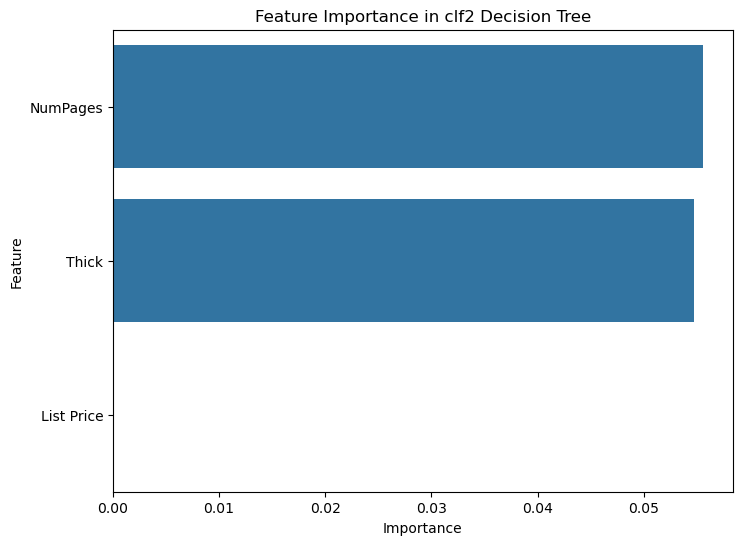

The most important predictor variable is 'NumPages' with an importance score of 0.0556


In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get feature importances from clf2
feature_importances = clf2.feature_importances_

# Get the names of the features used by the model
feature_names = clf2.feature_names_in_

# Create a DataFrame to hold the features and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in clf2 Decision Tree')
plt.show()

# Report the most important predictor variable
most_important_feature = feature_importance_df.iloc[0]
print(f"The most important predictor variable is '{most_important_feature['Feature']}' with an importance score of {most_important_feature['Importance']:.4f}")


Q9
The differences of interpreting coefficients in linear mode regression versus feature importances in decision trees are that coefficients show a direct relationship between predictors and outcome whereas feature importances show how each feature contributes to the model's algorithm. For coefficients the magnitude and sign of the coefficient indicate the strength and direction of the relationship between the predictor and the target. Alternatively, feature importances quantify how much each feature reduces impurity or increases information gain across all decision nodes in the tree.  

Q10
10. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

yes

AI Summary
using the ab_reduced_noNaN dataset. After preprocessing the data, we performed an 80/20 train-test split to create training and test datasets. We then trained a Decision Tree model (clf2) using features like NumPages, Thick, and List Price, and visualized the tree structure to understand how predictions are made. The performance of the model was evaluated using confusion matrices, and we computed sensitivity, specificity, and accuracy. We also addressed issues such as missing or mismatched feature names and learned how the decision tree model makes predictions by following a series of splits based on feature values. Finally, we explained how feature importances in decision trees differ from the coefficients in linear regression models, providing insights into how various features contribute to the model's predictions.